# ✅ Comparing one way vs two way perfect commuting $R_0$
Summary: Simple model estimates $R_0$ correctly when fitted to data simulated from 2-way perfect model.

In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from model import simulate
import matplotlib as mpl
import matplotlib.pyplot as plt
from grab_data import *
from basic_epidemic import fit_model
from itertools import product

mpl.rcParams['figure.dpi'] = 300

In [8]:
DATASET = 'CENSUS_LAD11'
flow_matrix = get_matrix(DATASET, full=True)
population_sizes = get_population_sizes(DATASET)
population_names = get_population_ordering(DATASET)

In [30]:
def simulate_and_fit(od_matrix, pop_sizes, t_delta=1 / 12):
    true_params = list(product(np.linspace(0.5, 3, 8), np.linspace(0.2, 0.8, 5)))
    true_r0 = []
    est_r0 = []
    tau_0, tau_1 = 9 / 24, 17 / 24
    total_pop = pop_sizes.sum()
    for b, g in true_params:
        if b/g<=1:
            continue
        true_params = dict(beta=b, gamma=g, tau_0=tau_0, tau_1=tau_1, flow_matrix=od_matrix,
                           population_sizes=pop_sizes, model='perfect')
        sim_data = simulate(**true_params)
        # not interested in extinctions
        while sim_data[1].sum(axis=(0, 1, 2)) / total_pop <= 0.05:
            sim_data = simulate(**true_params)
        true_r0.append(b / g)
        b_hat, g_hat, psi_hat = fit_model((sim_data[0].sum(axis=2), sim_data[1].sum(axis=2),
                                           sim_data[2].sum(axis=2)), od_matrix, pop_sizes, t_delta=t_delta)
        est_r0.append(b_hat / g_hat)
    return np.array(true_r0), np.array(est_r0)

In [31]:
res = simulate_and_fit(od_matrix=flow_matrix, pop_sizes=population_sizes, t_delta=1 / 12)

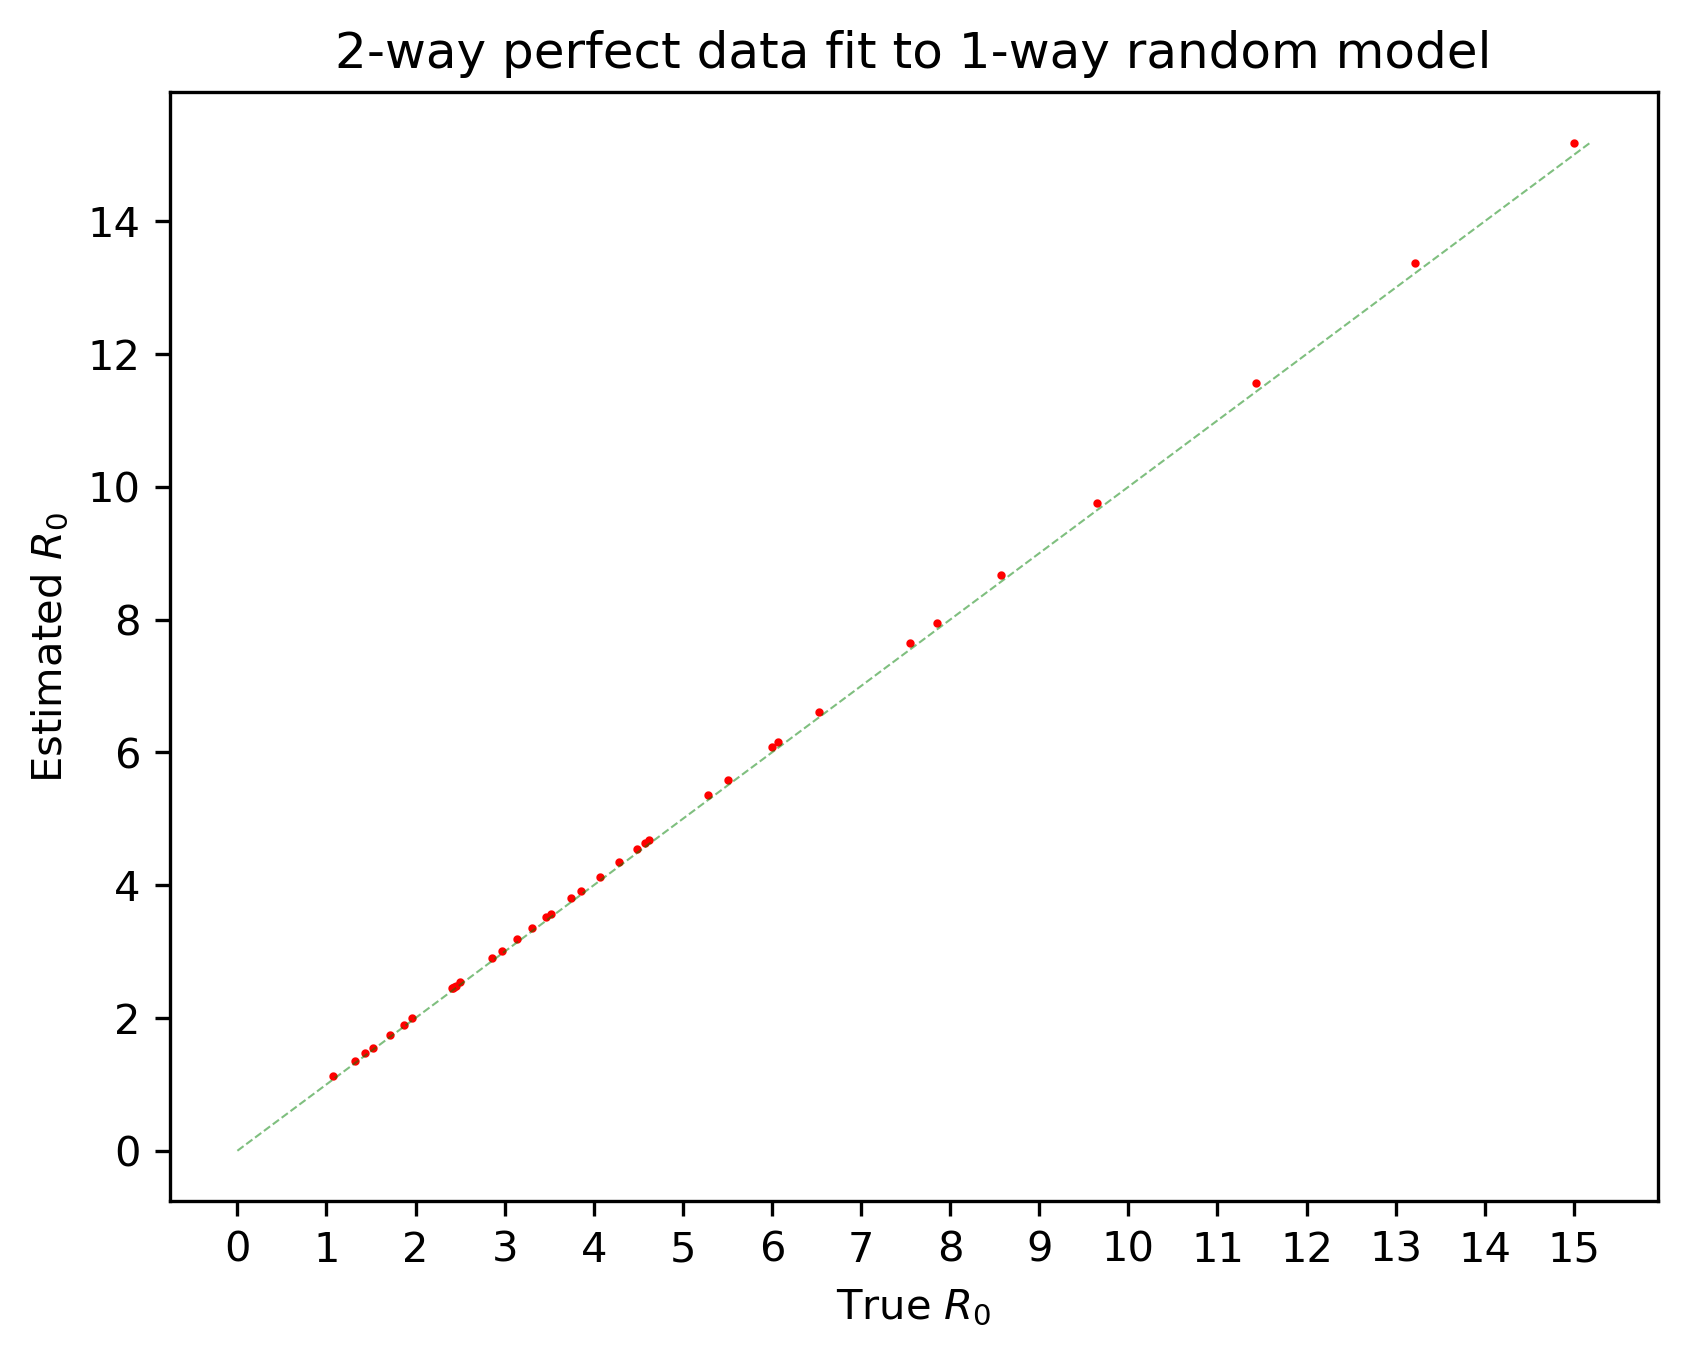

In [33]:
plt.plot(np.linspace(0, res[1].max(), 25), np.linspace(0, res[1].max(), 25), c='green', linestyle='--', alpha=0.5,
         linewidth=0.5)
plt.scatter(*res, s=1, c='r', marker='o')
plt.xlabel('True $R_0$')
plt.title('2-way perfect data fit to 1-way random model')
plt.ylabel('Estimated $R_0$')
plt.xticks(np.arange(0, res[1].max(),1 ))
plt.show()